# Desafio do Keggle: preço de casas da Ames Housing
-----------------
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data


-----------------------

## Objetivo geral:

Estimar os preços das casas através de seus atributos através de um algoritmo preditor de Machine Learning.

## Objetivo específico:


1. Estudar e compreender a base de dados e suas features, tal como a relação entre elas e com o target variable;
2. Realizar uma etapa de Data Cleaning, como preenchimento e tratamento de valores ausentes, correção de erros e conversão de formatos de dados.
3. Realizar uma etapa de análise exploratória de dados visando compreender as correlações entre os dados e as informações de cada feature;
----------------------

### Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from scipy.stats import spearmanr
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, StandardScaler, FunctionTransformer
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import time
from tqdm import tqdm

from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split

## Leitura e análise prévia

In [2]:
# leitura
train = pd.read_csv('train.csv', sep=',')
df_save = train.copy()

In [3]:
# visualização começo e fim
train.backfill()

C:\Users\lucas\AppData\Local\Temp\ipykernel_3140\317251526.py:2: FutureWarning: DataFrame.backfill/Series.backfill is deprecated. Use DataFrame.bfill/Series.bfill instead
  train.backfill()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


O DataFrame de possui algumas colunas com dados iguais a zero, por exemplo '"PoolArea" (area de piscina) = 0' que provavelmente significa que "não há" piscina na casa. Além disso, alguns vazios também podem significar a ausência do atributo na casa e um tratamento e análise mais minociosa para identificar essas particularidades dos dados é necessária.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Aparentemente **os tipos de cada feature estão corretos** e com a amostra coletada não identificou-se nenhuma coluna com valores numétricos e string ao mesmo tempo.

-------------

As features a seguir possuem a maior parte de suas series vazia:
 - Alley
 - PoolQC
 - MiscFeature
 - Fence
 
 Essa com cerca de metade de valores preenchidos:
  - FireplaceQu

Não há como saber se as variáveis **"object"** estão com seu tipo correto, dessa forma, será realizado uma **repetição printando o primeiro, do meio e último valor da feature.**

In [6]:
# checando os tipos corretos de objects
for feature in train:
    print(feature,f': <`{train[feature].dtype}>',train.loc[0,feature], train.loc[730,feature], train.loc[1459,feature],'\n')

Id : <`int64> 1 731 1460 

MSSubClass : <`int64> 60 120 20 

MSZoning : <`object> RL RL RL 

LotFrontage : <`float64> 65.0 39.0 75.0 

LotArea : <`int64> 8450 5389 9937 

Street : <`object> Pave Pave Pave 

Alley : <`object> nan nan nan 

LotShape : <`object> Reg IR1 Reg 

LandContour : <`object> Lvl Lvl Lvl 

Utilities : <`object> AllPub AllPub AllPub 

LotConfig : <`object> Inside Inside Inside 

LandSlope : <`object> Gtl Gtl Gtl 

Neighborhood : <`object> CollgCr StoneBr Edwards 

Condition1 : <`object> Norm Norm Norm 

Condition2 : <`object> Norm Norm Norm 

BldgType : <`object> 1Fam TwnhsE 1Fam 

HouseStyle : <`object> 2Story 1Story 1Story 

OverallQual : <`int64> 7 8 5 

OverallCond : <`int64> 5 5 6 

YearBuilt : <`int64> 2003 1995 1965 

YearRemodAdd : <`int64> 2003 1996 1965 

RoofStyle : <`object> Gable Gable Gable 

RoofMatl : <`object> CompShg CompShg CompShg 

Exterior1st : <`object> VinylSd CemntBd HdBoard 

Exterior2nd : <`object> VinylSd CmentBd HdBoard 

MasVnrType : <`

**Um estudo profundo particular para cada variável é necessário, além disso, um mapa de calor que possa ajudar a relacionar os valores vazios poderá se fazer necessária.**

-------------
## Análise e tratamento de NaN

-----------------

### Informações da descrição dos dados
       	
- **Alley:** Type of alley access to property
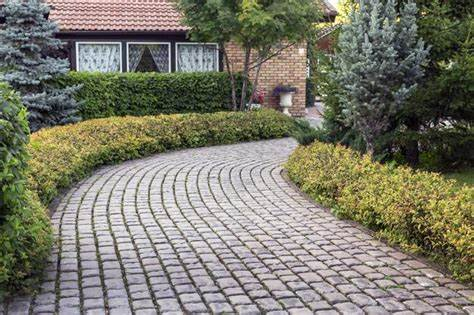
       
       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
           
   Para "Alley" os valores **vazios são os que não possuem uma entrada** que acredito que seja essa espécie de estrada para a casa. Dessa forma, será aplicado o rótulo "NA" (NA: não se aplica).
   
   
- **PoolQC:** Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

   Para "PoolQC" os valores **vazios são casas que não possuem piscina.** Dessa forma, os NaN serão substituidos por "NA". Além disso, como há uma coluna de "PoolArea", é **válido analisar o comportamento da área quando não a piscina** para ver se os dados estão fazendo sentido.
   
- **MiscFeature:** Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
 
   Os **vazios para a coluna "MiscFeature" são quando não há outro atributo da casa distinto dos demais** que não tenha uma feature própria para descrevelo. Dessa forma, seus tratamento será aplicando o rótulo "NA". Além do mais, há uma coluna "MiscVal" que atribui o valor do recurso exclusivo na casa (elevador, 2ª garagem, etc). A partir disso, vale **estudar o comportamento de "MiscVal" quando "MiscFeature" é vazio para validar as suas informações.**
  

- **Fence:** Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	 Good Wood
       MnWw	 Minimum Wood/Wire
       NA	   No Fence

   Os **vazios de "Fence" são a respeito das casas que não possuem cerca**, dessa forma será substituido pelo rótulo "NA". Não há nenhuma feature correlacionada.
   
   
- **FireplaceQu:** Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

   Os **vazios de "FireplaceQu" são para aquelas casas que não possuem lareira**, essa forma será substituido pelo rótulo "NA". Além disso, **a coluna "Fireplaces"**, correlacionada a outra, **deverá ser estudada** para entender a correlação quando a qualidade da lareira é NaN.

In [7]:
# separando features (input) da variável alvo (output)
X = train.drop(columns=['SalePrice'])
y = train['SalePrice'].copy()

In [8]:
print('"PoolArea" quando "PoolQC" é NaN: ',X['PoolArea'][X['PoolQC'].isnull() == True].unique())

"PoolArea" quando "PoolQC" é NaN:  [0]


In [9]:
print('"MiscVal" quando "MiscFeature" é NaN: ',X['MiscVal'][X['MiscFeature'].isnull() == True].unique())

"MiscVal" quando "MiscFeature" é NaN:  [0]


In [10]:
print('"Fireplaces" quando "FireplaceQu" é NaN: ',X['Fireplaces'][X['FireplaceQu'].isnull() == True].unique())

"Fireplaces" quando "FireplaceQu" é NaN:  [0]


As features "PoolArea", "MiscVal" e "Fireplaces" possui valor inteiro igual a zero quando as colunas relacionadas são vazias, o que faz sentido.

In [11]:
# lista das features para subistituir os NaN por "NA"
features_nan = ['Alley', 'PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu']

In [12]:
for feature in features_nan:
    X[feature].fillna(value='NA', axis=0, inplace=True)

In [13]:
X[features_nan].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Alley        1460 non-null   object
 1   PoolQC       1460 non-null   object
 2   MiscFeature  1460 non-null   object
 3   Fence        1460 non-null   object
 4   FireplaceQu  1460 non-null   object
dtypes: object(5)
memory usage: 57.2+ KB


**As colunas que possuiam a maior quantidade de valores vazios foram tratadas**. Dessa forma, agora será necessário buscar uma forma mais eficiente de **analisar as relações daquelas colunas que ainda possuem vazios** mas não de uma forma tão "grotesca" como as anteriores.

In [14]:
features = []
for nome in X:
    features.append(nome)

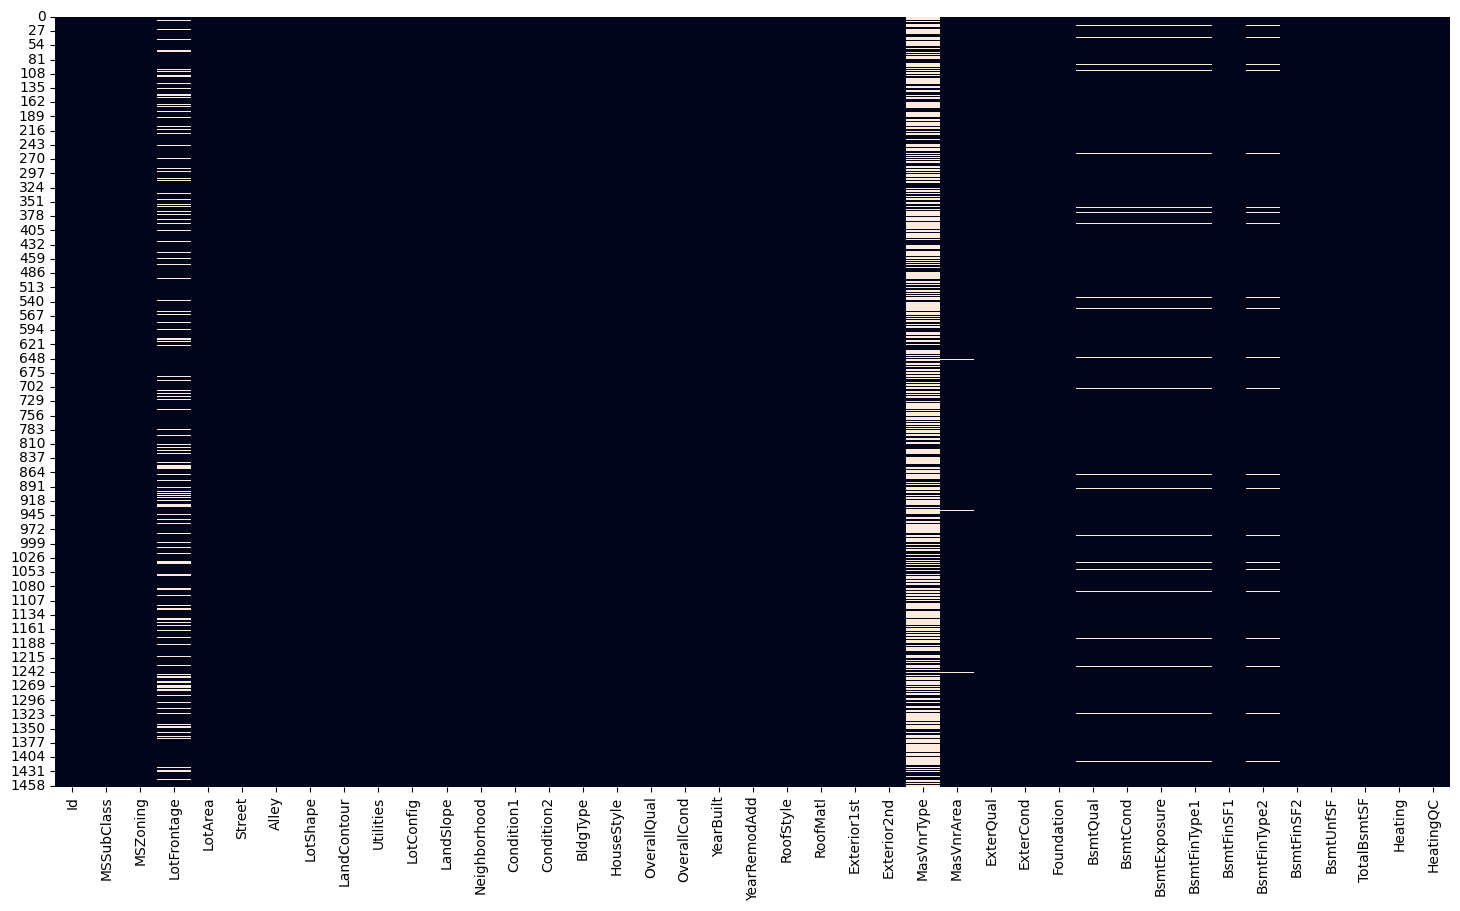

In [15]:
# primeros 41 features
plt.figure(figsize=(18,10))

sns.heatmap(X[features[:41]].isnull(), cbar=False)

plt.show()

In [16]:
display(X['LotFrontage'], X['LotFrontage'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: LotFrontage
Non-Null Count  Dtype  
--------------  -----  
1201 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

None

- **LotFrontage:** Linear feet (ft) of street connected to property

   Essa feature demonstra quantos pés é o tamanho da "frente" da casa, provavelmente quanto maior o tamanho, maior preço. Há cerca de 250 valores nulos na feature, dessa forma, aplicarei um transformador de regressão para preencher seus vazios.

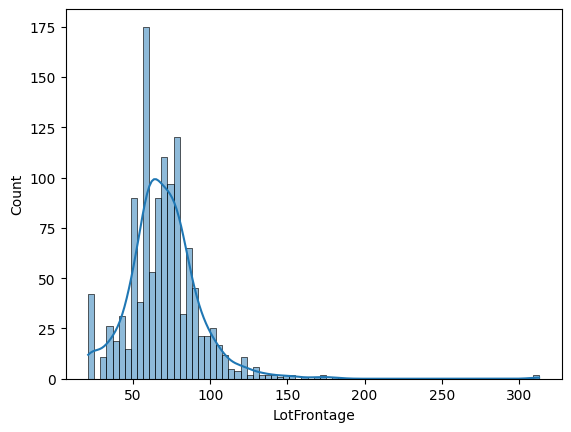

In [17]:
# definindo estratégia de acordo com a distribuição
sns.histplot(X['LotFrontage'],kde=True);

In [18]:
# initial_strategy = 'mean' pois a distribuição pode está simétrica (gaussiana)
imputer_LotFrontage = IterativeImputer(random_state=42, initial_strategy='mean')

In [19]:
imputer_LotFrontage.fit(X['LotFrontage'].array.reshape(-1, 1))

IterativeImputer(random_state=42)

In [20]:
X_LotFrontage = imputer_LotFrontage.transform(X['LotFrontage'].array.reshape(-1, 1))

In [21]:
X['LotFrontage'] = X_LotFrontage

In [22]:
X.LotFrontage.isnull().sum()

0

A coluna **LotFrontage** não possui mais vazios e está tratada.

---------------

- **Colunas BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 e BsmtFinType2:** Todas são colunas de de rótulos ordenados de qualidade do porão.

   Os valores vazios se referem as casas que não possuem porão, dessa forma, serão preenchidas com "NA".

In [23]:
features_nan_bstm = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

In [24]:
for feature in features_nan_bstm:
    X[feature].fillna(value='NA', axis=0, inplace=True)

----------------------

- **MasVnrType:** Masonry veneer type.

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
- **MasVnrArea:** Masonry veneer area in square feet.

   Quando as colunas acima estão vazias significa que não há folhado de alvenaria. Portanto 'MasVnrType' terá valor "NA" e 'MasVnrArea' valor 0.

In [25]:
X['MasVnrType'].fillna(value='NA', axis=0, inplace=True)
X['MasVnrArea'].fillna(value=0, axis=0, inplace=True)

------------

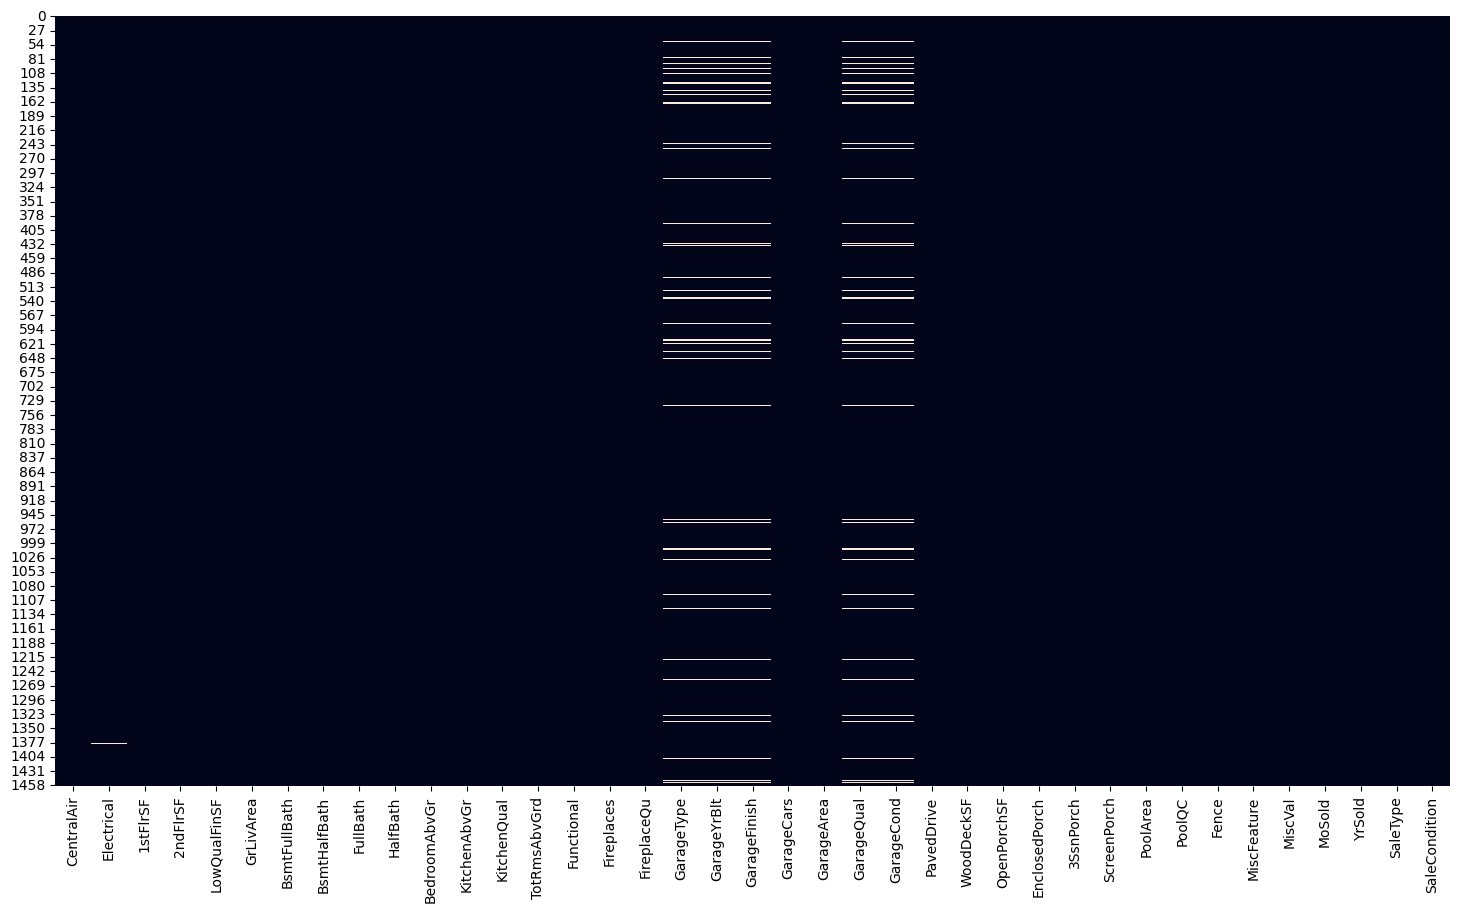

In [26]:
# últimas 41 features
plt.figure(figsize=(18,10))

sns.heatmap(X[features[41:]].isnull(), cbar=False)

plt.show()

- **GarageType, GarageFinish, GarageQual, GarageCond:** Features de rótulo ordenadas e não ordenadas a respeito da garagem.

                        
- **GarageYrBlt:** Feature numérica do ano de construção da garagem.

   As features de rótulo receberam o valor "NA" e a numérica "0". Além disso, vale entender como o GarageArea e GarageCars se comportam quando os outros Garage são nulos.

In [27]:
# lista de features com garage para análise
features_garage = []
for feature in X:
    if 'Garage' in feature:
        features_garage.append(feature)

In [28]:
X[features_garage][X.GarageYrBlt.isnull() == True]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,NaN,NaN,0,0,NaN,NaN
48,NaN,NaN,NaN,0,0,NaN,NaN
78,NaN,NaN,NaN,0,0,NaN,NaN
88,NaN,NaN,NaN,0,0,NaN,NaN
89,NaN,NaN,NaN,0,0,NaN,NaN
...,...,...,...,...,...,...,...
1349,NaN,NaN,NaN,0,0,NaN,NaN
1407,NaN,NaN,NaN,0,0,NaN,NaN
1449,NaN,NaN,NaN,0,0,NaN,NaN
1450,NaN,NaN,NaN,0,0,NaN,NaN


In [29]:
# lista de features garage de rótulo
features_garage_nan = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

In [30]:
# preenchendo features garage de rótulo
for feature in features_garage_nan:
    X[feature].fillna(value='NA', axis=0, inplace=True)

In [31]:
X['GarageYrBlt'].fillna(value=0, axis=0, inplace=True)

In [32]:
X.isnull().sum().sort_values(ascending=False)

Electrical       1
Id               0
BedroomAbvGr     0
GarageType       0
FireplaceQu      0
                ..
MasVnrType       0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
SaleCondition    0
Length: 80, dtype: int64

In [33]:
# será substituido pelo valor mais frequente
X['Electrical']

0       SBrkr
1       SBrkr
2       SBrkr
3       SBrkr
4       SBrkr
        ...  
1455    SBrkr
1456    SBrkr
1457    SBrkr
1458    FuseA
1459    SBrkr
Name: Electrical, Length: 1460, dtype: object

In [34]:
# valor mais frequente
X['Electrical'].fillna(value='SBrkr', axis=0, inplace=True)

In [35]:
X.isnull().sum().sort_values(ascending=False)

Id               0
MSSubClass       0
GarageType       0
FireplaceQu      0
Fireplaces       0
                ..
MasVnrType       0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
SaleCondition    0
Length: 80, dtype: int64

-----------------------------
## Análise de variação dos dados com describe

In [36]:
features_0_26 = features[:26]
features_26_52 = features[26:52]
features_52_81 = features[52:]

In [37]:
display(X[features_0_26].describe(), X[features_26_52].describe(), X[features_52_81].describe())

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000


,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438
std,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778
min,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000
max,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000


,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1.046575,6.517808,0.613014,1868.739726,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,0.220338,1.625393,0.644666,453.697295,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1.000000,5.000000,0.000000,1958.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [38]:
# lista de feature com desvio padrão abaixo de 1
features_std_low = []
features_name_std_low = []

X_num = X.select_dtypes(include=[np.number])

for feature in X_num:
    std = np.std(X[feature])
    if std < 1:
        features_std_low.append([feature, std])
        features_name_std_low.append(feature)

In [39]:
# ordenar nome das features dentro da lista de acordo com o segundo valor
def secondElement(element):
    return element[1]

features_std_low.sort(key=secondElement, reverse=True)

In [40]:
# print da lista com desvio de forma decrescente
for item in features_std_low:
    print(f'{item[0]}: {item[1]:.2f}')

BedroomAbvGr: 0.82
GarageCars: 0.75
Fireplaces: 0.64
FullBath: 0.55
BsmtFullBath: 0.52
HalfBath: 0.50
BsmtHalfBath: 0.24
KitchenAbvGr: 0.22


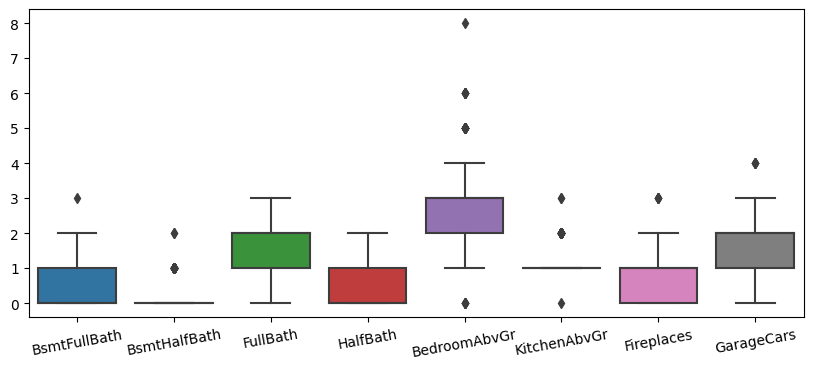

In [41]:
plt.figure(figsize=(10,4))

sns.boxplot(data=X[features_name_std_low])
plt.xticks(rotation=10)

plt.show()

As features **BsmtHalfBath e KitchenAbvGr** não possuem intervalor interquartil. Por isso, serão excluídas por falta de variação nos dados.

As outras colunas, apesar de possuírem um intervalo interquartil não possuem muita variância também e **suas mediana (segudno quartil) está mesclada com outros quartis**. Apesar disso, momentaneamento essas features serão mantidas.

In [42]:
X.drop(columns=['BsmtHalfBath', 'KitchenAbvGr'], axis=1, inplace=True)

-----------------------------
## Análise exploratória dos dados

In [43]:
# novo dataframe somente para a exploração
df_eda = X.copy()
df_eda['SalePrice'] = y.copy()

In [44]:
df_eda.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [45]:
corr_matrix = df_eda.select_dtypes(include=np.number).corr()

In [46]:
corr_matrix = corr_matrix['SalePrice'].sort_values(ascending=False)[1:]
corr_matrix

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
Name: SalePrice, dtype: float64

Diversas features numéricas possuem uma tendência crescente linear com o preço de venda. Muitas das outras que **não possuem tendência linear podem possui outros tipos de correlações** não lineares com a variável, dessa forma será interessante **estudar essas correlações através de outros métodos**.

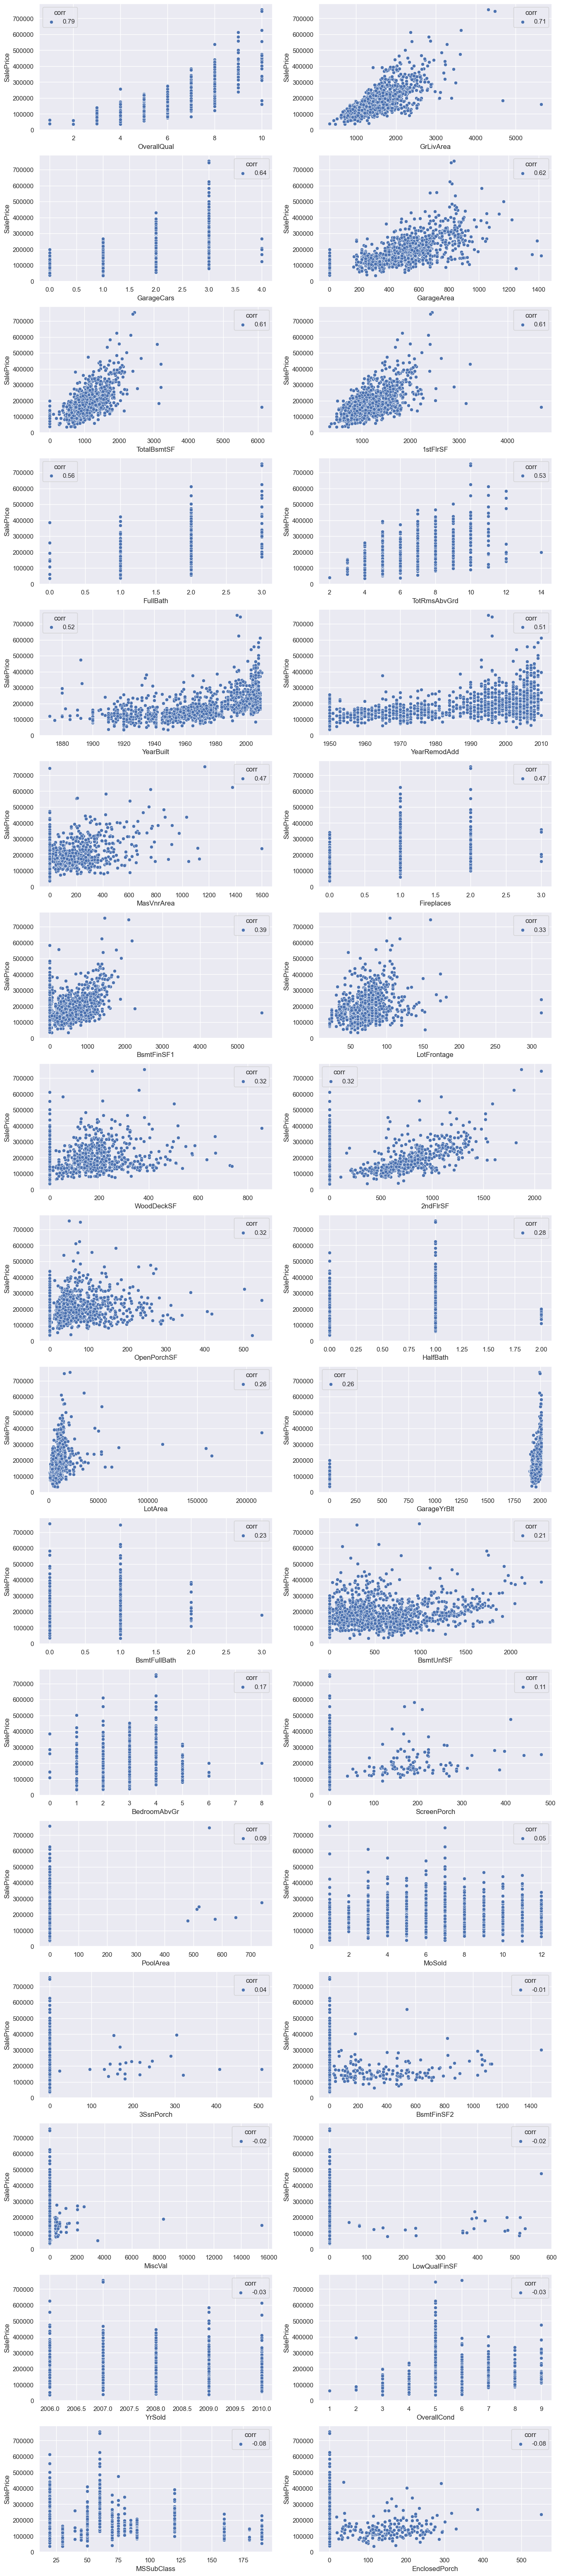

In [47]:
feature_names = corr_matrix.copy().index.tolist()
feature_names.remove('Id')

n_cols = int(min(len(feature_names), 2))
n_rows = int(np.ceil(len(feature_names)/n_cols))

sns.set()
fig, ax = plt.subplots(n_rows, n_cols, figsize=(16,80))
ax = ax.flatten()

i=0

for feature, ax in zip(feature_names, ax):
    ax = sns.scatterplot(data=df_eda,y=df_eda['SalePrice'], x=feature, ax=ax, label=feature)
    ax.legend([f'{corr_matrix[i]:.2f}'], title='corr')
    i+=1

plt.show()

- As colunas com correlação linear possuem uma variâção na dispersão significativa que pode acarretar em erros significativos no estimador devido a faixa de "SalePrice" que abrange.
- Algumas correlações menores possuem uma relação linear mas estão sendo ofuscadas devido a grande quantidade de valores (o, "não há") nos dados.
- Os dados de "GarageYrBlt" possuem uma variação muito grande na sua escala, será de interesse para o modelo reduzir essa escala com tentar "comprimi-la", ou ainda, transformar esses dados em rótulos ordenados.

,SalePrice,GarageYrBlt
SalePrice,1.0,0.486362


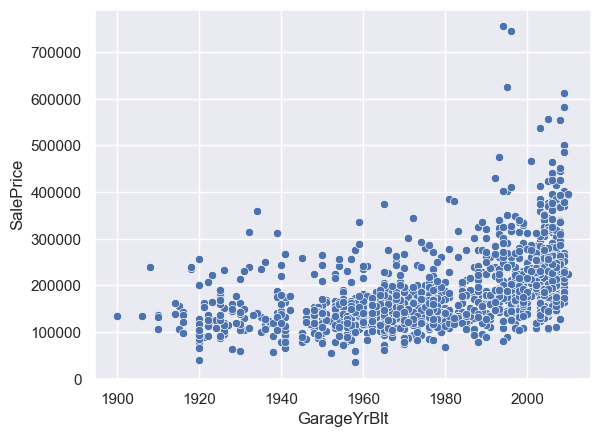

In [48]:
# scatter plot ignorando os zeros
sns.scatterplot(data=df_eda[df_eda['GarageYrBlt']>0],y='SalePrice', x='GarageYrBlt');

# correlação do preço de vendas com o ano da construção da garagem
df_eda[['SalePrice', 'GarageYrBlt']][df_eda['GarageYrBlt']>0].corr()[:1]

A correlação entre a feature GarageYrBlt e a variável alvo melhorou muito após a eliminação dos dados igauis a zero, que não possuíam garagem. No entanto, não treinar o modelo com casas que não possuem garage (excluindo esses dados) pode enviesar o modelo a errar com essa classe de casas, o que a princípio não parece ser uma boa ideia. Dessa forma, se encontrará alguma maneira de aproximar as escalas entre os anos e o zero.

In [49]:
#função de transformação para deixar GarageYrBlt 
#1900 é o ano da primeira garagem construída, dessa forma os anos serão subtraídos  por 1901 para não zerar o primeiro
def GarageYrBltescala(data):
    for i, dado in enumerate(data['GarageYrBlt']):
        if dado > 0:
            data.loc[i, 'GarageYrBlt'] -= 1901

In [50]:
GarageYrBltescala(df_eda)

,SalePrice,GarageYrBlt
SalePrice,1.0,0.48672


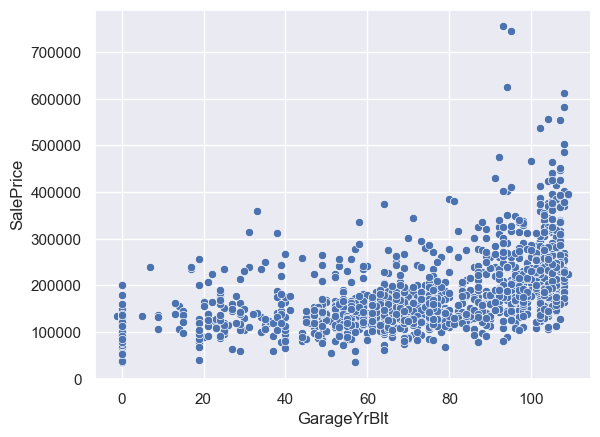

In [51]:
sns.scatterplot(data=df_eda,y='SalePrice', x='GarageYrBlt');

df_eda[['SalePrice', 'GarageYrBlt']][df_eda['GarageYrBlt']>0].corr()[:1]

Com a aplicação da função, a **relação entre a variável "GarageYrBlt" e a "SalePrice" melhoraram significativamente.**

No que diz a respeito da análise exploratório para as features numéricas, não há mais nada a ser feito. Porém, também se faz necessário estudar as features categóricas.

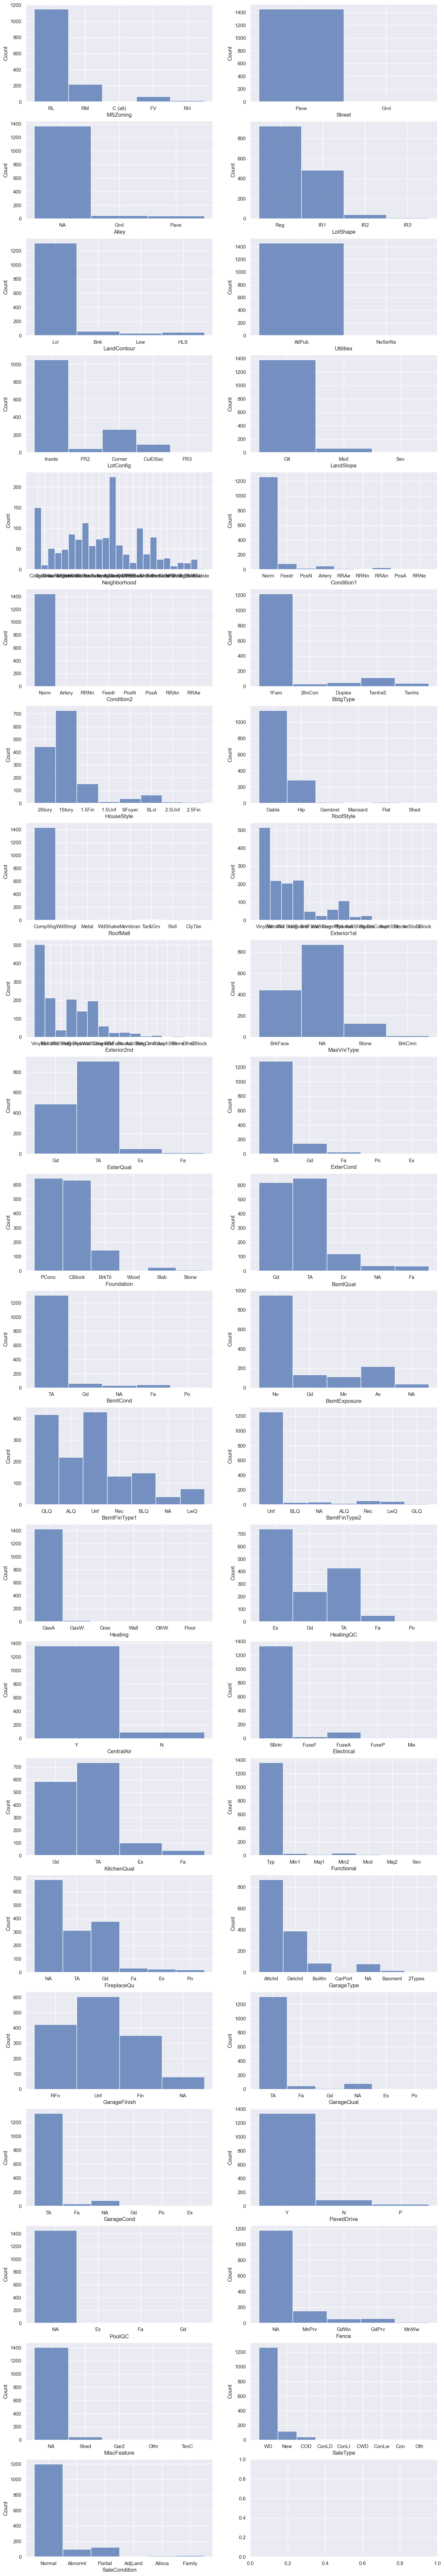

In [52]:
features_cat_names = df_eda.select_dtypes(np.object_).columns.tolist()

n_cols = int(min(len(features_cat_names),2))
n_rows = int(np.ceil(len(features_cat_names)/n_cols))

sns.set()
fig, ax = plt.subplots(n_rows, n_cols, figsize=(16,100))
ax = ax.flatten()

for feature, ax in zip(features_cat_names, ax):
    ax = sns.histplot(data=df_eda, x=feature, ax=ax)
    
plt.show()

- A feature **"Street", Utilities,** não possui significância devido a sua alta concentração de dados em apenas uma categoria.
- A feature **LandSlope** também possui uma grande concentração de dados em apenas uma categoria, porém uma analise dos valores medianos das propriedades por categoria pode ser necessária para tomar alguma decisão.
- A maioria das features com mais de duas categorias possuem categorias com pouquíssimos dados, dessa forma, será necessário fazer um clustering das categorias com KModes.

In [53]:
# dropando colunas sem variação de categorias
df_eda.drop(columns=['Street', 'Utilities', 'Id'], axis=1, inplace=True)

In [54]:
# selecionar features categoricas
features_cat_names = df_eda.select_dtypes(np.object_).columns.tolist()
spear_corr = []

# calcular a correlação de spearman com a variável alvo e armazenala em lista
for feature in features_cat_names:
    corr, pval = spearmanr(df_eda[feature], df_eda['SalePrice'])
    spear_corr.append((feature, corr, pval))

In [55]:
# ordenar nome das features dentro da lista de acordo com o terceiro valor
def threeElement(element):
    return element[2]

In [56]:
# sortear decrescente a lista de correlações
spear_corr.sort(key=threeElement, reverse=False)

# print da lista com correlação de spearman
features_cat_names_order = []
for item in spear_corr:
    features_cat_names_order.append(item[0])
    print(f'{item[0]}: {item[1]:.2f}, val-p: {item[2]:.2e}')

ExterQual: -0.63, val-p: 1.64e-164
BsmtQual: -0.57, val-p: 2.51e-127
KitchenQual: -0.57, val-p: 1.78e-126
GarageType: -0.52, val-p: 4.99e-101
Foundation: 0.49, val-p: 8.08e-90
GarageFinish: -0.48, val-p: 1.44e-84
HeatingQC: -0.47, val-p: 1.27e-81
GarageCond: 0.35, val-p: 2.31e-42
MSZoning: -0.33, val-p: 1.34e-39
SaleCondition: 0.32, val-p: 4.84e-36
GarageQual: 0.32, val-p: 1.40e-35
CentralAir: 0.31, val-p: 1.30e-34
LotShape: -0.31, val-p: 5.27e-33
Electrical: 0.30, val-p: 8.16e-31
PavedDrive: 0.28, val-p: 8.02e-28
HouseStyle: 0.25, val-p: 7.14e-23
BsmtExposure: -0.25, val-p: 4.26e-22
Fence: 0.19, val-p: 4.65e-13
Condition1: 0.19, val-p: 6.51e-13
SaleType: -0.18, val-p: 1.17e-11
Neighborhood: 0.17, val-p: 1.93e-10
RoofStyle: 0.14, val-p: 7.55e-08
Alley: 0.14, val-p: 1.87e-07
Functional: 0.14, val-p: 2.13e-07
ExterCond: 0.13, val-p: 8.80e-07
BsmtCond: 0.12, val-p: 1.87e-06
BsmtFinType2: 0.12, val-p: 2.10e-06
BldgType: -0.12, val-p: 4.32e-06
FireplaceQu: -0.12, val-p: 7.35e-06
Heating: -0

## Divisão em features e target

In [57]:
y = df_save.SalePrice
X = df_save.drop(columns='SalePrice', axis=1)

## Construção do Pré-processamento


--------------

#### Criação das funções utilizadas para todo pré-processamento dos dados brutos.

In [58]:
def drop_columns(data):
    lista_drop = ['Id', 'BsmtHalfBath', 'KitchenAbvGr', 'Street', 'Utilities', 'BsmtFinSF2', 'EnclosedPorch',
                  '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'LowQualFinSF', 'BedroomAbvGr']
    lista_drop_iteracao = []
    for feature in data:
        if feature in lista_drop:
            lista_drop_iteracao.append(feature)
            
    return data.drop(columns=lista_drop_iteracao, axis=1)

# tratamento de valores vazios personalizados para cada feature
def tratamento_nan(data):
    features_nan_cat = ['Alley', 'PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu',
                    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                    'BsmtFinType2', 'MasVnrType', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
    features_data = data.columns.tolist()
            
    for feature in features_nan_cat:
        if feature in features_data:
            data[feature].fillna(value='NA', axis=0, inplace=True)
    
    features_nan_num = ['MasVnrArea', 'GarageYrBlt']
    for feature in features_nan_num:
        if feature in features_data:
            data[feature].fillna(value=0, axis=0, inplace=True)
    
    if 'Electrical' in features_data:
        data['Electrical'].fillna(value='SBrkr', axis=0, inplace=True)
    
    return data

# série de condições para separar o que é feature categórica ordenada e não ordenada
def encontrar_features_cat(data):
    features_cat_names = data.select_dtypes(include=np.object_).columns.tolist()
    key_cat_ord = ['Qual', 'QC', 'Cond', 'Qu', 'Qú', 'Finish']
    feature_cat_ord = []
    feature_cat_n_ord = []

    for feature in features_cat_names: 
        if key_cat_ord[0] in feature:
            feature_cat_ord.append(feature)
        elif key_cat_ord[1] in feature:
            feature_cat_ord.append(feature)
        elif key_cat_ord[2] in feature:
            if 'Condition' in feature:
                feature_cat_n_ord.append(feature)
            else:
                feature_cat_ord.append(feature)
        elif key_cat_ord[3] in feature:
            feature_cat_ord.append(feature)
        elif key_cat_ord[4] in feature:
            feature_cat_ord.append(feature)
        elif key_cat_ord[5] in feature:
            feature_cat_ord.append(feature)
        else:
            feature_cat_n_ord.append(feature)
    
    return feature_cat_ord, feature_cat_n_ord

#### Pipeline de pré-processamento

In [59]:
# pipeline numérica
pipeline_num = make_pipeline(FunctionTransformer(drop_columns), FunctionTransformer(tratamento_nan), SimpleImputer(strategy="median"), StandardScaler())
# pipeline para features categóricas ordenadas
pipeline_cat_ord = make_pipeline(FunctionTransformer(drop_columns), FunctionTransformer(tratamento_nan), SimpleImputer(strategy="most_frequent"), OrdinalEncoder())
# pipeline para features categóricas não ordenadas
pipeline_cat_nord = make_pipeline(FunctionTransformer(drop_columns), FunctionTransformer(tratamento_nan), SimpleImputer(strategy="most_frequent"), OneHotEncoder())

# retorna a uma lista das features categóricas ordenadas e não ordenadas
feature_cat_ord, feature_cat_n_ord = encontrar_features_cat(X)

# transformer para pré-processamento
pprocess = make_column_transformer(
    (pipeline_num, make_column_selector(dtype_include=np.number)),
    (pipeline_cat_ord, feature_cat_ord),
    (pipeline_cat_nord, feature_cat_n_ord),
    remainder='passthrough'
)

## Construção das funções para escolha dos melhores hiperparâmetros

-----------
Os algoritmos ensemble regressores a serem utilizados serão Random Forest, Extreme Gradient Boosting e Histogram Gradient Boosting. Todos esses pela seu ótimo desempenho para regressões, alta aplicabilidade e versatilidade, além do XGBoost e HistGradientBoosting serém otimizados para grandes datasets.

In [60]:
# função para selecionar os melhores hiperparâmetros com RandomSearchCV
def best_hipparamns(X, y):
    modelos_base = [
        ('XGBoost', XGBRegressor()),
        ('RandomForestRegressor', RandomForestRegressor()),
        ('HistGradientBoostingRegressor', HistGradientBoostingRegressor())
    ]

    hiperparametros = {
        'XGBoost': {
            'learning_rate': [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1],
            'max_depth': range(3, 16),
            'min_child_weight': [1, 3, 5, 7],
            'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
            'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
            'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
            'reg_alpha': [0, 0.001, 0.01, 0.1, 1, 10, 100],
            'reg_lambda': [0, 0.001, 0.01, 0.1, 1, 10, 100],
            'scale_pos_weight': [1, 3, 5, 7, 9],
            'n_estimators': [50, 100, 200, 500, 1000, 2000]
        },
        'RandomForestRegressor': {
            'n_estimators': [100, 200, 300, 500, 700],  # Número de árvores de decisão na floresta
            'criterion': ["squared_error", "absolute_error", "friedman_mse", "poisson"],  # Critério para medir a qualidade da divisão
            'max_depth': [None, 5, 10],  # Profundidade máxima das árvores de decisão
            'min_samples_split': [2, 5, 10],  # Número mínimo de amostras necessárias para dividir um nó interno
            'min_samples_leaf': [1, 2, 4],  # Número mínimo de amostras necessárias para ser um nó folha
            'max_features': ["sqrt", "log2", None],  # Número de recursos a serem considerados ao procurar a melhor divisão
        },
        'HistGradientBoostingRegressor': {
            'loss': ['squared_error', 'absolute_error', 'poisson'],  # Função de perda a ser otimizada
            'learning_rate': [0.01, 0.1, 0.6],  # Taxa de aprendizado do Histogram Gradient Boosting
            'max_iter': [100, 200, 300, 500],  # Número máximo de iterações
            'max_depth': [None, 5, 10],  # Profundidade máxima das árvores
            'min_samples_leaf': [1, 2, 4],  # Número mínimo de amostras necessárias para ser um nó folha
            'max_bins': [50, 100, 255],  # Número máximo de bins (compartimentos) para os recursos numéricos
            'l2_regularization': [0.0, 0.1, 1.0],  # Regularização L2 (Ridge) para evitar overfitting
        }
    }

    best_params = {}

    start_time = time.time() # início

    for name, modelo in tqdm(modelos_base, desc="Best_paramns", unit="modelo"):
        rscv = RandomizedSearchCV(estimator=modelo, param_distributions=hiperparametros[name], 
                                  cv=5, verbose=0, n_iter=10, n_jobs=-1,scoring='neg_root_mean_squared_error',
                                  error_score='raise', random_state=42)
        rscv.fit(X, y)
        best_params[name] = rscv.best_params_

    end_time = time.time() # fim
    optimization_time = (end_time - start_time)/60

    return best_params, print(f"\nTempo hiperparâmetros: {optimization_time:.2f}min")

def preparo_modelos(best_params):
    modelos = [
        ('XGBoost', XGBRegressor(
            **best_params['XGBoost'], random_state=42
        )),
        ('RandomForestRegressor', RandomForestRegressor(
            **best_params['RandomForestRegressor'], random_state=42
        )),
        ('HistGradientBoostingRegressor', HistGradientBoostingRegressor(
            **best_params['HistGradientBoostingRegressor'], random_state=42)),
    ]
    
    return modelos

## Construção da função para escolher p melhor modelo através da validação cruzada

In [61]:
def cvs_modelos(modelos, X, y):
    start_time = time.time() # início

    for name, modelo in tqdm(modelos, desc="Cross_val", unit="modelo"):
        cvs = -cross_val_score(modelo, X, y, cv=10, scoring='neg_root_mean_squared_error')
        print(f'{name}: ${np.mean(cvs)} ±{np.std(cvs)}')

    end_time = time.time() # fim
    optimization_time = (end_time - start_time)/60

    print(f"\nTempo total de validação cruzada: {optimization_time:.2f}min")

## Aplicação do pré-processamento, escolha dos melhores parâmetros, feature importance e validação cruzada

In [63]:
X_pro = pprocess.fit_transform(X).toarray()

best_params, _ = best_hipparamns(X_pro, y) # seleção de melhores parâmetros

modelos = preparo_modelos(best_params) # colocando os hiperparâmetros em seus respectivos modelos

cvs_modelos(modelos, X_pro, y) # validação cruzada

Best_paramns: 100%|██████████████████████████████████████████████████████████████████| 3/3 [04:30<00:00, 90.01s/modelo]



Tempo hiperparâmetros: 4.50min


Cross_val:  33%|███████████████████████                                              | 1/3 [00:14<00:29, 14.69s/modelo]

XGBoost: $25859.88995835316 ±7008.903380669463


Cross_val:  67%|██████████████████████████████████████████████                       | 2/3 [00:57<00:31, 31.39s/modelo]

RandomForestRegressor: $30057.067905481475 ±7248.226165607773


Cross_val: 100%|█████████████████████████████████████████████████████████████████████| 3/3 [02:04<00:00, 41.58s/modelo]

HistGradientBoostingRegressor: $27891.580571068924 ±8181.506221540435

Tempo total de validação cruzada: 2.08min


In [85]:
np.max(y), np.min(y), np.median(y) # valores máximo, mínimo e mediana de preço das casas

(755000, 34900, 163000.0)

## Treinamento do melhor modelo e pontuação da competição
--------------

O modelo de melhor desempenho foi o XGBoost, com menor RMSE e desvio padrão. O valor obtido foi interessante e não é muito significativo, visto que a faixa de preço de vasas é entre 755 mil dólares e 35mil, com mediana de 163mil dólares.

Dessa forma, é esperado que o modelo seja mais limitado ao predizer casas muito baratas ou casas muito caras, principalmente pela falta de representatividade dessas casas no dataset de treino.

In [88]:
X_test = pd.read_csv('test.csv', sep=',') # importando base de teste
Id = X_test.Id.copy() # copiando o Id

X_test_pro = pprocess.transform(X_test).toarray() # aplicando pré-processamento

_, xgb = modelos[0] # pegando xgboost com os melhores parâmetros

xgb.fit(X_pro, y) # treino do XGB com toda base de dados de treino

y_pred = xgb.predict(X_test_pro) # predição dos dados de teste

In [89]:
# submissão
submission = pd.DataFrame({'Id': Id, 'SalePrice': y_pred})
submission.to_csv('submission_XGBoost.csv', index=False)

Pontuação final de **0.13426**, onde quanto menor, melhor. O ranking global da competição foi de 1200.

O modelo final ficou com uma ótima generalização, conseguindo obter ótimos predições para preço de casas sem grande discrepância nos preços. Além do mais, esse dataset proporcionou a evolução em diversas habilidades no que diz a respeito da análise exploratória de dados, data cleaning, construção de pipeline, ensembles, entre outros.